In [1]:
# TAREAS DE LOS MÓDULOS DE CNN Y RNN - MIAX9
# Para cada uno de los siguientes ejercicios entregar un fichero en ipython notebook  (.ipynb).
# En cada fichero tenéis que solucionar un ejercicio distinto, es importante que comentéis la
# solución que habéis realizado y los resultados obtenidos.
# El código ha de ser compilable desde Google Colab (utilizando el entorno de Colab), y no
# ha de contener errores. En los casos en los que se pide entrenar un modelo razona sobre
# la evolución del error de entrenamiento y de validación durante el entrenamiento.
# La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de
# Instituto BME.

In [2]:
# 5.- Diseña un modelo en Keras que utilice capas densas, LSTM, GRU, y convolucionales
# para estimar los valores de apertura Microsoft utilizando como entrada los valores de
# apertura de los datos de al menos Amazon, Microsoft, Meta (facebook), Apple y Google
# de los 10 días anteriores. Compáralo con un modelo con una capa lineal.

In [3]:
#from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, LSTM, GRU, MaxPooling1D

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

2.11.0


In [4]:
def datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model):
    salida=np.zeros((17))
    #trainableParams
    salida[0] = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
    #nonTrainableParams
    salida[1] = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
    #totalParams
    salida[2] = salida[0] + salida[1]
    
    #Train
    score = model.evaluate(x_train, t_train)
    salida[3] = score[0]
    salida[4] = score[1]
    y_hat = model.predict(x_train)
    # El  error de la predicion en train
    salida[5] = np.mean(abs(y_hat[:,0]-t_train))
    # La media de error en la prediccion en train 
    salida[6] =np.mean(np.abs(t_train))
    
    #Test
    score = model.evaluate(x_test, t_test)
    salida[7] = score[0]
    salida[8] = score[1]
    y_hat_test = model.predict(x_test)
    # El  error de la predicion en test
    salida[9] = np.mean(abs(y_hat_test[:,0]-t_test))
    # La media de error en la prediccion en test
    salida[10] = np.mean(np.abs(t_test))
    
    # numero de datos de entrada en train
    salida[11] = x_train.shape[0]
    #dimensiones de la entrada
    salida[12] =len(x_train.shape)
    # valor de la dimension 1 de la entrada
    if salida[12] >= 1:
        salida[13] = x_train.shape[0]
    # valor de la dimension 2 de la entrada
    if salida[12] >= 2:
        salida[14] = x_train.shape[1]
    # valor de la dimension 3 de la entrada
    if salida[12] >= 3:
        salida[15] = x_train.shape[2]
    # valor de la dimension 4 de la entrada
    if salida[12] >= 4:
        salida[16] = x_train.shape[3]
    
    print(len(salida))
    
    import pandas as pd 
    df = pd.read_csv ('metricas.csv', index_col=0) 
    print(df.shape)
    df[model_title] = salida
    df.to_csv('metricas.csv') 

    return salida, df


In [5]:
def sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    
    
    dd_amzn = pd.read_csv("amzn.us.txt", delimiter=",")
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    dd_fb = pd.read_csv("fb.us.txt", delimiter=",")
    dd_aapl = pd.read_csv("aapl.us.txt", delimiter=",")
    dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
    
    
    amzn_op = dd_amzn['Open'].values
    msft_op = dd_msft['Open'].values
    fb_op = dd_fb['Open'].values
    aapl_op = dd_aapl['Open'].values
    googl_op = dd_googl['Open'].values
    
    print(amzn_op.shape)
    print(msft_op.shape)
    print(fb_op.shape)
    print(aapl_op.shape)
    print(googl_op.shape)
    
    # Como no coinciden en el tiempo los 5 valores me cojo solo los que coinciden
    # Primero me los ordeno teniendo en cuenta la fecha
    aa = dd_amzn['Date'].values #
    amzn_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        amzn_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #


    aa = dd_msft['Date'].values #
    msft_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        msft_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_fb['Date'].values #
    fb_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_aapl['Date'].values #
    aapl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        aapl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_googl['Date'].values #
    googl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10)) 
    
    
    # Los ploteo y veo que hay un tramo en el coinciden las fechas
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax1.plot(amzn_indice,amzn_op, label='amzn_indice,amzn_op')
    ax1.plot(msft_indice,msft_op, label='msft_indice,msft_opp')
    ax1.plot(fb_indice,fb_op, label='fb_indice,fb_op')
    ax1.plot(aapl_indice,aapl_op, label='aapl_indice,aapl_op')
    ax1.plot(googl_indice,googl_op, label='googl_indice,googl_op')
    ax1.legend()
    
    # Me quedo solo las fechas que coinciden
    indices = set(amzn_indice) & set(msft_indice) & set(fb_indice) & set(aapl_indice) & set(aapl_indice)

    ii = np.in1d(amzn_indice,list(indices))
    data_amzn = amzn_op[ii]
    ii = np.in1d(msft_indice,list(indices))
    data_msft = msft_op[ii]
    ii = np.in1d(fb_indice,list(indices))
    data_fb = fb_op[ii]
    ii = np.in1d(aapl_indice,list(indices))
    data_aapl = aapl_op[ii]
    ii = np.in1d(googl_indice,list(indices))
    data_googl = googl_op[ii]



    # Los ploteo y ahora síí coinciden en todo el tramo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax2.plot(data_amzn, label='data_amzn')
    ax2.plot(data_msft, label='data_msft')
    ax2.plot(data_fb, label='data_fb')
    ax2.plot(data_aapl, label='data_aapl')
    ax2.plot(data_googl, label='data_googl')
    ax2.legend()
    
    # Los coloco todos juntos en un dataset
    DAT = np.zeros((data_googl.shape[0],5))
    DAT[:,1] = data_amzn
    DAT[:,0] = data_msft
    DAT[:,2] = data_fb
    DAT[:,3] = data_aapl
    DAT[:,4] = data_googl

    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax3.plot(DAT[:,0], label='data_msft')
    ax3.plot(DAT[:,1], label='data_amzn')
    ax3.plot(DAT[:,2], label='data_fb')
    ax3.plot(DAT[:,3], label='data_aapl')
    ax3.plot(DAT[:,4], label='data_googl')
    ax3.legend()
    
    #normalizo de 0 a 1. Esto no cubre la ############### pero me deja todo normalizado
    # se podria usar a lo menos DAT = StandardScaler().fit_transform(DAT). 
    # pero se a usado para otro tipo de casos y me da valores mayoires de 1 y menores de -1
    DAT[:,0] = DAT[:,0]/DAT[:,0].max()
    DAT[:,1] = DAT[:,1]/DAT[:,1].max()
    DAT[:,2] = DAT[:,2]/DAT[:,2].max()
    DAT[:,3] = DAT[:,3]/DAT[:,3].max()
    DAT[:,4] = DAT[:,4]/DAT[:,4].max()
    
    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax4.plot(DAT[:,0], label='data_msft')
    ax4.plot(DAT[:,1], label='data_amzn')
    ax4.plot(DAT[:,2], label='data_fb')
    ax4.plot(DAT[:,3], label='data_aapl')
    ax4.plot(DAT[:,4], label='data_googl')
    ax4.legend()

    
    return DAT



In [6]:
def sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    
    
    dd_amzn = pd.read_csv("amzn.us.txt", delimiter=",")
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    dd_fb = pd.read_csv("fb.us.txt", delimiter=",")
    dd_aapl = pd.read_csv("aapl.us.txt", delimiter=",")
    dd_googl = pd.read_csv("googl.us.txt", delimiter=",")
    
    
    amzn_op = dd_amzn['Open'].values
    msft_op = dd_msft['Open'].values
    fb_op = dd_fb['Open'].values
    aapl_op = dd_aapl['Open'].values
    googl_op = dd_googl['Open'].values
    
    print(amzn_op.shape)
    print(msft_op.shape)
    print(fb_op.shape)
    print(aapl_op.shape)
    print(googl_op.shape)
    
    # Como no coinciden en el tiempo los 5 valores me cojo solo los que coinciden
    # Primero me los ordeno teniendo en cuenta la fecha
    aa = dd_amzn['Date'].values #
    amzn_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        amzn_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #


    aa = dd_msft['Date'].values #
    msft_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        msft_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_fb['Date'].values #
    fb_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_aapl['Date'].values #
    aapl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        aapl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #

    aa = dd_googl['Date'].values #
    googl_indice = np.zeros(aa.shape) #
    for n in range(0, aa.shape[0]):
        cc = aa[n]
        qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
        qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
        qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

        googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3 #
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10)) 
    
    
    # Los ploteo y veo que hay un tramo en el coinciden las fechas
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax1.plot(amzn_indice,amzn_op, label='amzn_indice,amzn_op')
    ax1.plot(msft_indice,msft_op, label='msft_indice,msft_opp')
    ax1.plot(fb_indice,fb_op, label='fb_indice,fb_op')
    ax1.plot(aapl_indice,aapl_op, label='aapl_indice,aapl_op')
    ax1.plot(googl_indice,googl_op, label='googl_indice,googl_op')
    ax1.legend()
    
    # Me quedo solo las fechas que coinciden
    indices = set(amzn_indice) & set(msft_indice) & set(fb_indice) & set(aapl_indice) & set(aapl_indice)

    ii = np.in1d(amzn_indice,list(indices))
    data_amzn = amzn_op[ii]
    ii = np.in1d(msft_indice,list(indices))
    data_msft = msft_op[ii]
    ii = np.in1d(fb_indice,list(indices))
    data_fb = fb_op[ii]
    ii = np.in1d(aapl_indice,list(indices))
    data_aapl = aapl_op[ii]
    ii = np.in1d(googl_indice,list(indices))
    data_googl = googl_op[ii]



    # Los ploteo y ahora síí coinciden en todo el tramo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax2.plot(data_amzn, label='data_amzn')
    ax2.plot(data_msft, label='data_msft')
    ax2.plot(data_fb, label='data_fb')
    ax2.plot(data_aapl, label='data_aapl')
    ax2.plot(data_googl, label='data_googl')
    ax2.legend()
    
    # Los coloco todos juntos en un dataset
    DAT = np.zeros((data_googl.shape[0],5))
    DAT[:,1] = data_amzn
    DAT[:,0] = data_msft
    DAT[:,2] = data_fb
    DAT[:,3] = data_aapl
    DAT[:,4] = data_googl

    # Los ploteo
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.figure()
    ax3.plot(DAT[:,0], label='data_msft')
    ax3.plot(DAT[:,1], label='data_amzn')
    ax3.plot(DAT[:,2], label='data_fb')
    ax3.plot(DAT[:,3], label='data_aapl')
    ax3.plot(DAT[:,4], label='data_googl')
    ax3.legend()
    
    # Hacemos el log y la rentabilidad para que no haya correlacion entre los valores y 
    # para remover la heterocedasticidad.
    #Aplico el retorno logaritmico
    DAT_1 = np.diff(np.log(DAT),axis=0)

    ax4.plot(DAT_1[:,0], label='data_msft')
    ax4.plot(DAT_1[:,1], label='data_amzn')
    ax4.plot(DAT_1[:,2], label='data_fb')
    ax4.plot(DAT_1[:,3], label='data_aapl')
    ax4.plot(DAT_1[:,4], label='data_googl')
    ax4.legend()
    
    return DAT_1

In [7]:
def Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG,DAT_1):
    # Reordeno el dataset para hacer bloques de LAG dias
    #LAG = 11
    DAT_TS = np.zeros((DAT_1.shape[0]-LAG,LAG,DAT_1.shape[1]))

    for ii in range(0,DAT_1.shape[0]-LAG):
        #print(DAT_TS.shape)
        #print(DAT_1.shape)
        DAT_TS[ii,:,:] = DAT_1[ii:ii+LAG,:]
    # Tengo (#muestras,#longitud,#variables)
    # print(DAT_TS.shape)
    #print(DAT_TS[700])

    #Separaro todo el dataset en los datos de apertura de 10 días anteriores para estimar 
    # el valor del día actual

    Ntr = np.floor(DAT_TS.shape[0])
    data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]

    Y_target = 0
    data_y = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]

    #hago el split de train y test
    from sklearn.model_selection import train_test_split
    x_train, x_test, t_train, t_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)

    return x_train, x_test, t_train, t_test


In [8]:
# Evaluamos el modelo segun los datos mas generales para evaluarlo
# PARA USARLO PARA EL TFM; COMPLETO CON accuracy Y val_accuracy AUNQUE NO ES EJERCICIO
# DE CLASIFICAION Y VALERO DIJO QUE accuracy SOLO LO VIERAMOS EN EJERCICIOS DE CLASIFICION

def graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist):
    import matplotlib.pyplot as plt
    %matplotlib inline
    #Train
    score = model.evaluate(x_train, t_train)
    print('SCORE DE TRAIN:')
    print(score)

    #Test
    print('SCORE DE TEST:')
    score_1 = model.evaluate(x_test, t_test)
    print(score_1)

    n_epochs = len(hist.history['loss'])
    hd = hist.history
    epochs = range(1, n_epochs+1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, hd['accuracy'], "r", label="train")
    plt.plot(epochs, hd['val_accuracy'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()
    plt.show()
    return score, score_1

In [9]:
#Cree esta funcion segun lo que Valero son ensenaba en clase
# PARA USARLO PARA EL TFM;
def ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model):
    
    #ESTUDIO GRAFICO DE RESULTADOS PARA EVALUAR
    # Evaluamos el modelo en train
    score = model.evaluate(x_train, t_train, verbose=0)
    print(f'Evaluamos el modelo en train_score: {score}')

    # Predecimos con los datos de train
    y_hat = model.predict(x_train)
    print(f'Predecimos con los datos de train: {np.mean(abs(y_hat[:,0]-t_train))}')
    print(f'Predecimos con los datos de train_cantidad/dimensiones de datos:{y_hat.shape}')
    print(f' La media de error en la prediccion en entrenamiento es: {np.mean(np.abs(t_train))}')

    # Predecimos con los datos de test
    y_hat_test = model.predict(x_test)
    print(f' El  error de la predicion usando datos de test es de : {np.mean(abs(y_hat_test[:,0]-t_test))}')
    print(f' La media de error en la prediccion en test es: {np.mean(np.abs(t_test))}')

    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(20, 10)) 
    # Mostramos las predicciones de entrenamiento
    print(f'Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:')

    #plt.figure()
    ax1.plot(y_hat[:,0], label='y_hat[:,0] datos')    
    ax1.plot(t_train, label='t_train predicciones')
    ax1.grid(True)
    #ax1.xlabel("valores")
    #ax1.ylabel("nuero de dato ordinalmente")
    ax1.legend()

    #plt.figure()
    ax2.plot(t_train,y_hat[:,0],'.', label='t_train VSy_hat[:,0],')
    ax2.grid(True)
    #ax2.xlabel("t_train")
    #ax2.ylabel("y_hat[:,0],")
    ax2.legend()

    # Mostramos las predicciones de test
    ax3.plot(y_hat_test[:,0], label='y_hat_test[:,0] datos')
    ax3.plot(t_test, label=' t_testpredicciones')
    ax3.grid(True)
    #ax3.xlabel("valores")
    #ax3.ylabel("nuero de dato ordinalmente")
    ax3.legend()

    ax4.plot(t_test,y_hat_test[:,0],'.', label='t_test VS y_hat_test[:,0]')
    ax4.grid(True)
    #ax4.xlabel("t_test")
    #ax4.ylabel("y_hat_test[:,0]")
    ax4.legend()

    
    ax5.plot(model.weights[0].numpy().reshape(-1),'o-',label="Pesos neurona primera capa")
    ax5.grid(True)
    #ax5.xlabel("numero de la neurona ordinalmente")
    #ax5.ylabel("peso de la neurona")
    #ax5.title("Pesos neurona primera capa")
    ax5.legend()
    
    return



In [10]:
def activo_caso_1(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt

    
    model = Sequential()
    model.add(GRU(10, input_shape=(10,5,),return_sequences=True))
    model.add(LSTM(5,return_sequences=True))
    model.add(Conv1D(5, 3, activation='relu',padding='same'))
    model.add(Flatten())
    model.add(Dense(1))


    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [11]:
def activo_caso_2(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt
    
    # como hay 917 datos ( en este caso entiendo dato como set de 10 valores (como una foto que tiene 32*32 pxl es un dato)
    # de entrada en train, pues hago una red de 90 parametros a entrenar
    
    model = Sequential()
    model.add(GRU(2, input_shape=(10,5,),return_sequences=True))
    model.add(LSTM(1,return_sequences=True))
    model.add(Conv1D(2, 3, activation='relu',padding='same'))
    model.add(Flatten())
    model.add(Dense(1))


    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [12]:
def activo_caso_3(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt
    #Modelo equivalente en dimensiones usando 1 convolucional + LSTM + GRU + Dense
    model = Sequential()
    model.add(Conv1D(10,3, input_shape=(10,5,),padding='valid'))
    model.add(GRU(5,return_sequences=True))
    model.add(LSTM(5))
    model.add(Flatten())
    model.add(Dense(1))


    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

In [13]:
def activo_caso_4(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt
    
    # como hay 917 datos ( en este caso entiendo dato como set de 10 valores (como una foto que tiene 32*32 pxl es un dato)
    # de entrada en train, pues hago una red de 90 parametros a entrenar
    
    model = Sequential()
    model.add(Conv1D(2,3, input_shape=(10,5,),padding='valid'))
    model.add(GRU(1,return_sequences=True))
    model.add(LSTM(2))
    model.add(Flatten())
    model.add(Dense(1))


    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.9 MB/s eta 0:00:00
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 10)            510       
                                                                 
 lstm (LSTM)                 (None, 10, 5)             320       
                                                                 
 conv1d (Conv1D)             (None, 10, 5)             80        
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 961
Trainable 

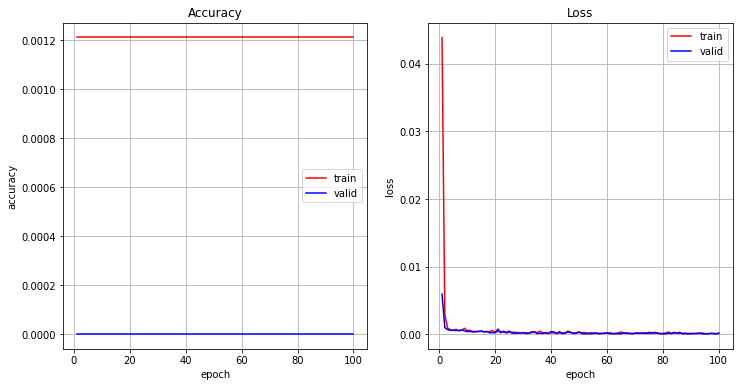

Evaluamos el modelo en train_score: [0.00024361802206840366, 0.0010905124945566058]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.012840275077827912
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.013229928135568891
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


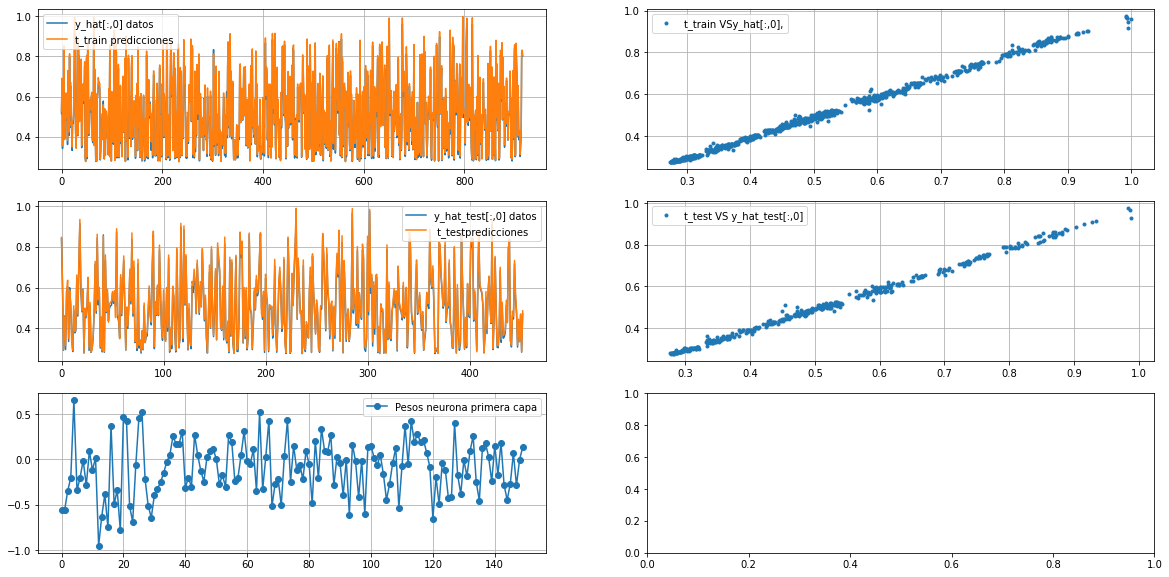

In [14]:
DAT =  sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_1(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_1_GRU(10_LSTM(5_Conv1D(5, 3_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 10, 2)             54        
                                                                 
 lstm_1 (LSTM)               (None, 10, 1)             16        
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 2)             8         
                                                                 
 flatten_1 (Flatten)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 7s 79

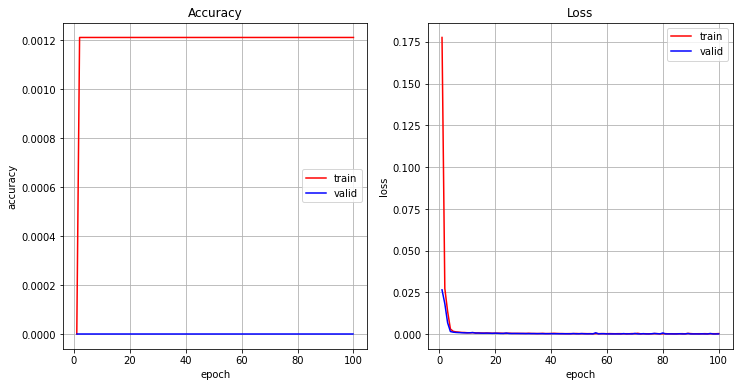

Evaluamos el modelo en train_score: [0.00032313467818312347, 0.0010905124945566058]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.013699641543520005
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.014700363993350715
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


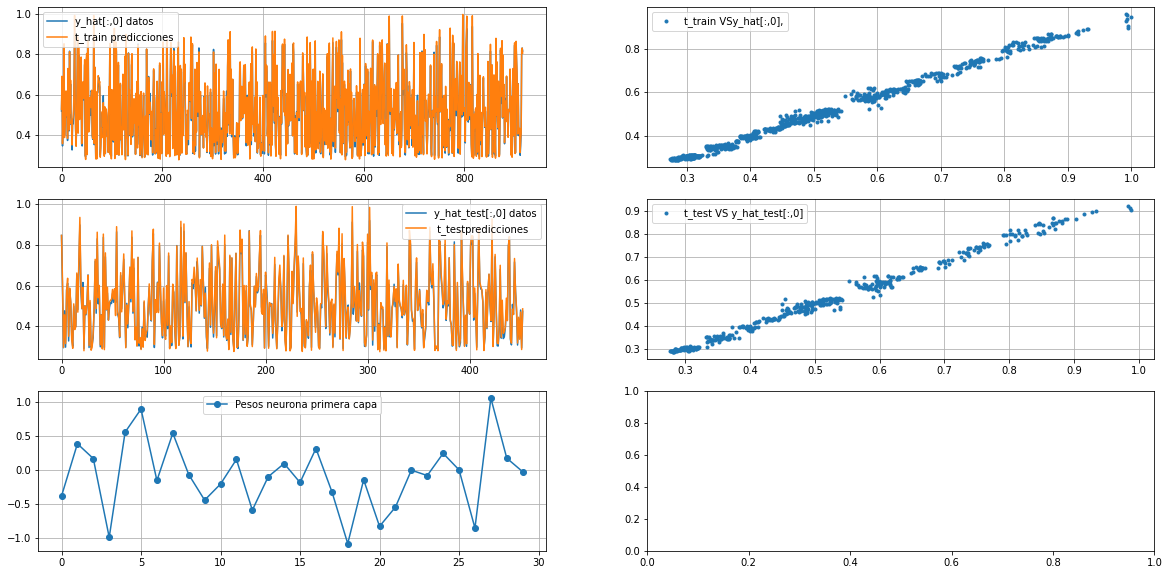

In [15]:
DAT =  sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_2(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_2_GRU(2_LSTM(1_Conv1D(2, 3_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 10)             160       
                                                                 
 gru_2 (GRU)                 (None, 8, 5)              255       
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 flatten_2 (Flatten)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 5s 

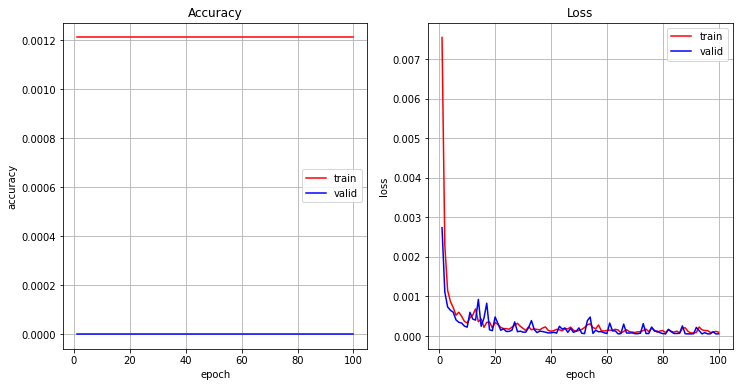

Evaluamos el modelo en train_score: [6.916283018654212e-05, 0.0010905124945566058]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.0061248449269925885
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.006094781482885608
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


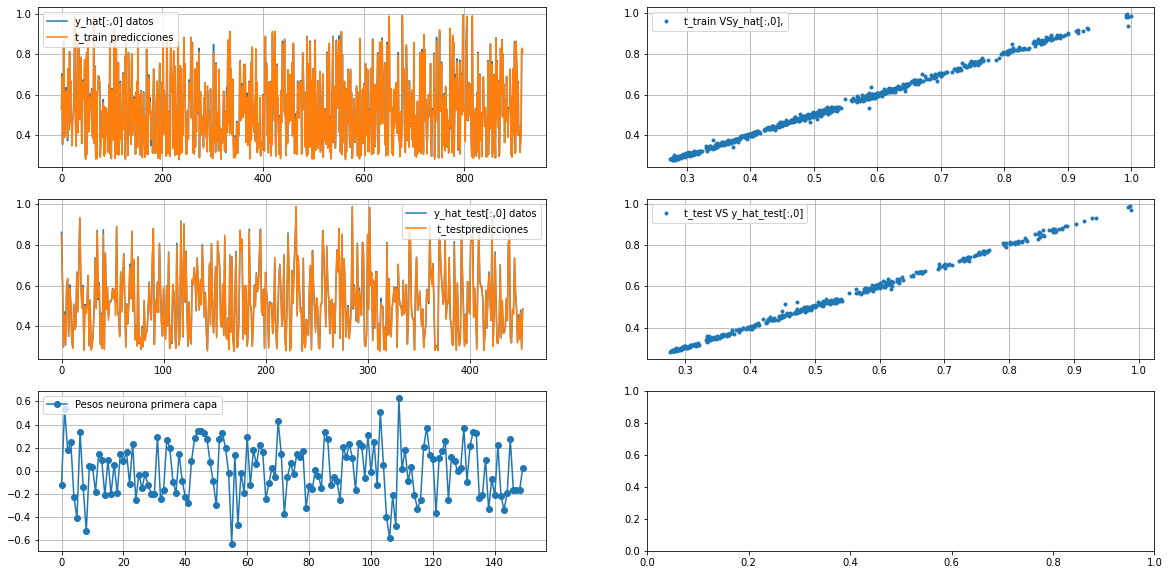

In [16]:
DAT =  sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_3(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_3_Conv1D(10,3_GRU(5_LSTM(5_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 8, 2)              32        
                                                                 
 gru_3 (GRU)                 (None, 8, 1)              15        
                                                                 
 lstm_3 (LSTM)               (None, 2)                 32        
                                                                 
 flatten_3 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 7s 64

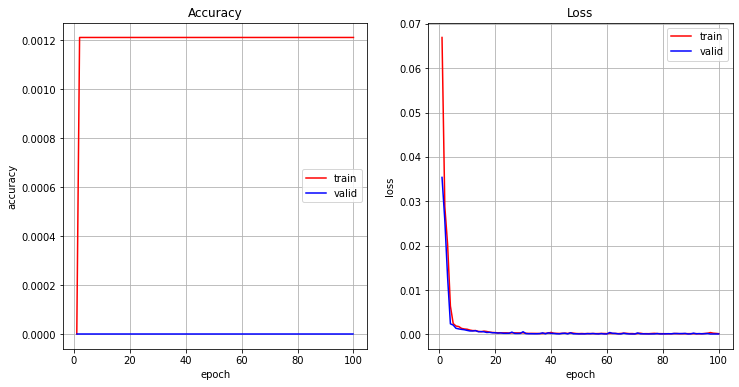

Evaluamos el modelo en train_score: [0.00012254202738404274, 0.0010905124945566058]
29/29 [==============================] - 1s 5ms/step
Predecimos con los datos de train: 0.008361771137199622
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.5219936066660071
15/15 [==============================] - 0s 8ms/step
 El  error de la predicion usando datos de test es de : 0.008698635410576425
 La media de error en la prediccion en test es: 0.5205517800275568
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


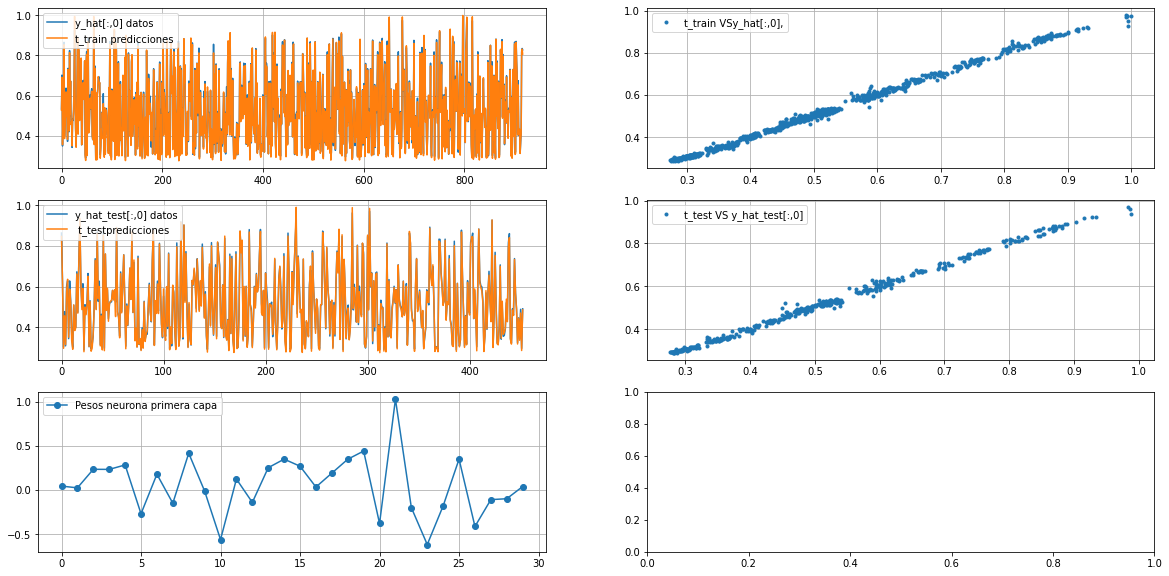

In [17]:
DAT =  sacar_open_5_valores_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_4(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_4_Conv1D(2,3_GRU(1_LSTM(2_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 10, 10)            510       
                                                                 
 lstm_4 (LSTM)               (None, 10, 5)             320       
                                                                 
 conv1d_4 (Conv1D)           (None, 10, 5)             80        
                                                                 
 flatten_4 (Flatten)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 7s 

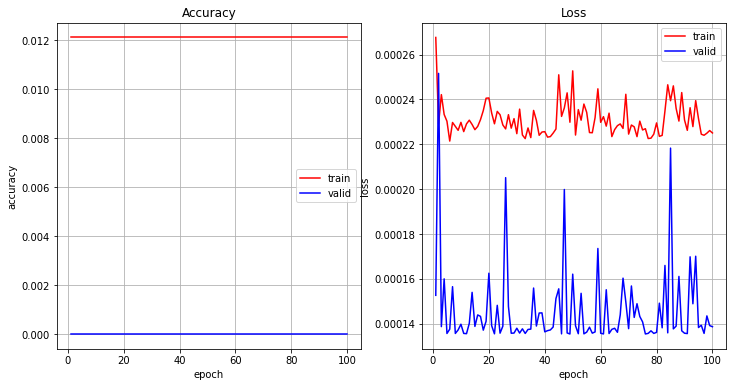

Evaluamos el modelo en train_score: [0.00021384401770774275, 0.010905125178396702]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.009965503083470354
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422247
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.009535840123899483
 La media de error en la prediccion en test es: 0.009271483187945665
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


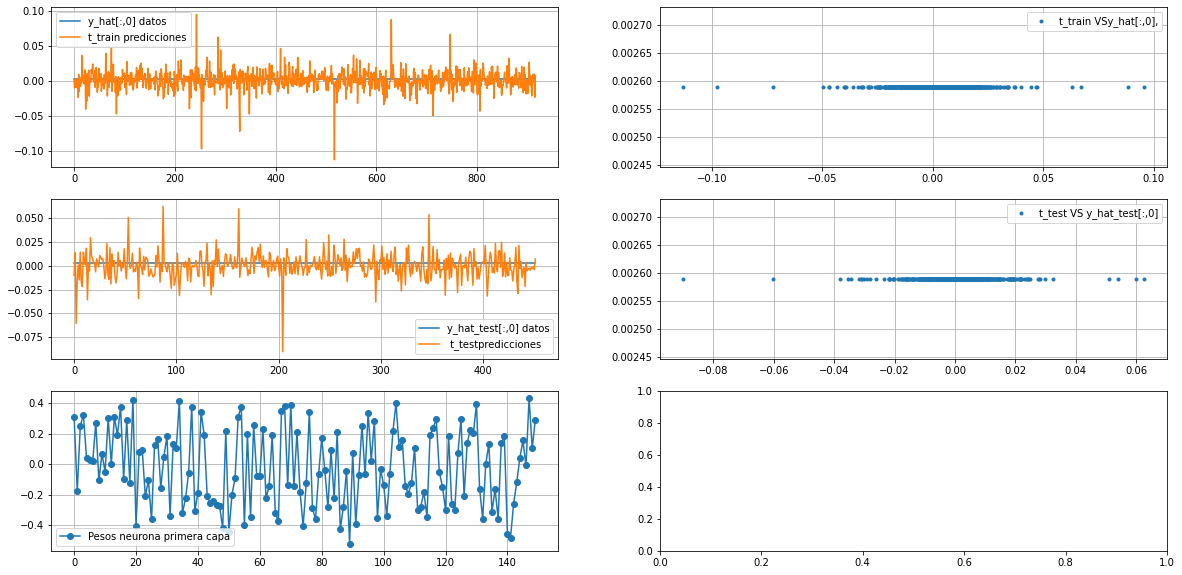

In [18]:
DAT =  sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_1(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_1_GRU(10_LSTM(5_Conv1D(5, 3_Dense(1_CON_RETORNO_LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 10, 2)             54        
                                                                 
 lstm_5 (LSTM)               (None, 10, 1)             16        
                                                                 
 conv1d_5 (Conv1D)           (None, 10, 2)             8         
                                                                 
 flatten_5 (Flatten)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 7s 10

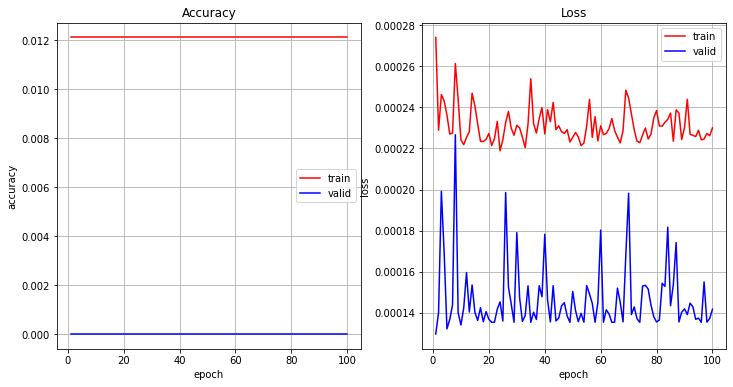

Evaluamos el modelo en train_score: [0.00021641459898091853, 0.010905125178396702]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.010073158681340167
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422247
15/15 [==============================] - 0s 3ms/step
 El  error de la predicion usando datos de test es de : 0.009697970223148736
 La media de error en la prediccion en test es: 0.009271483187945665
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


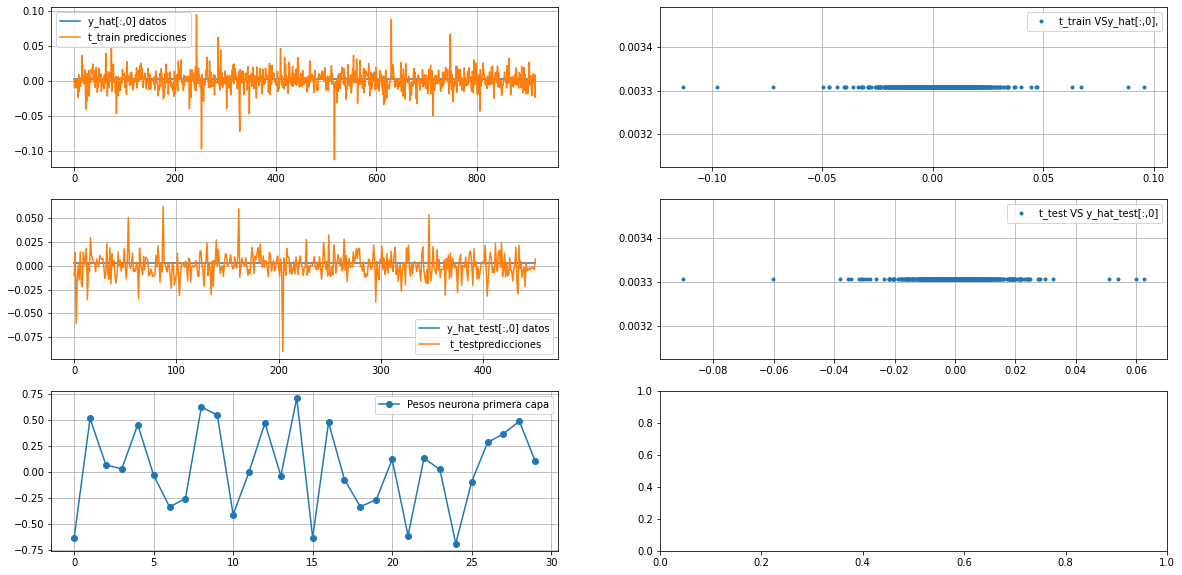

In [19]:
DAT =  sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_2(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_2_GRU(2_LSTM(1_Conv1D(2, 3_Dense(1_CON_RETORNO_LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 8, 10)             160       
                                                                 
 gru_6 (GRU)                 (None, 8, 5)              255       
                                                                 
 lstm_6 (LSTM)               (None, 5)                 220       
                                                                 
 flatten_6 (Flatten)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 5s 

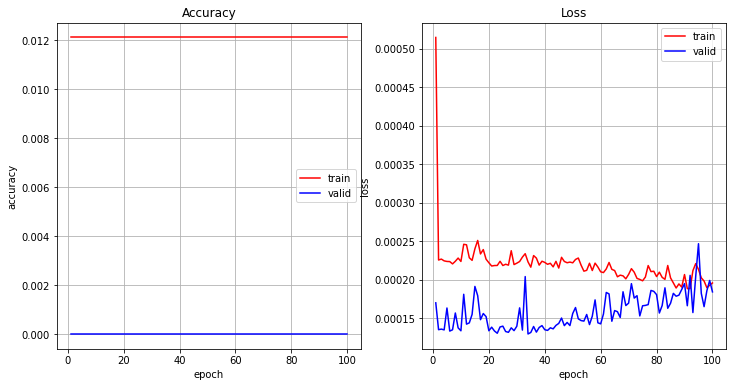

Evaluamos el modelo en train_score: [0.00017907103756442666, 0.010905125178396702]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.009280998013288256
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422247
15/15 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.010803246906795575
 La media de error en la prediccion en test es: 0.009271483187945665
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


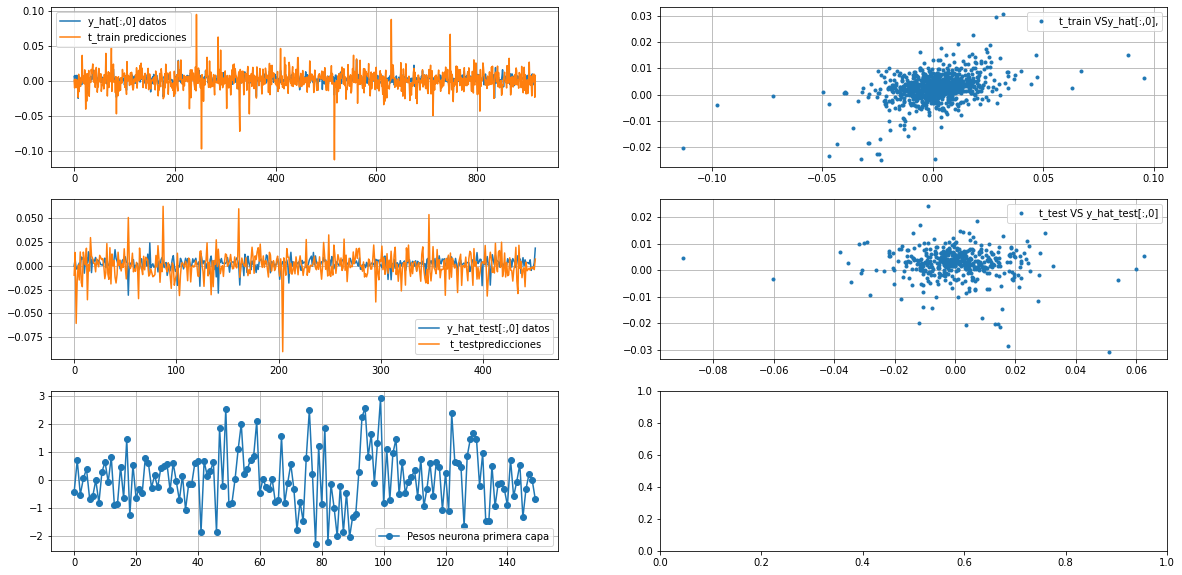

In [20]:
DAT =  sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_3(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_3_Conv1D(10,3_GRU(5_LSTM(5_Dense(1_CON_RETORNO_LOG'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(5153,)
(7983,)
(1381,)
(8364,)
(3333,)


<ipython-input-7-1cf2d1bcfff8>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-7-1cf2d1bcfff8>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 8, 2)              32        
                                                                 
 gru_7 (GRU)                 (None, 8, 1)              15        
                                                                 
 lstm_7 (LSTM)               (None, 2)                 32        
                                                                 
 flatten_7 (Flatten)         (None, 2)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 6s 61

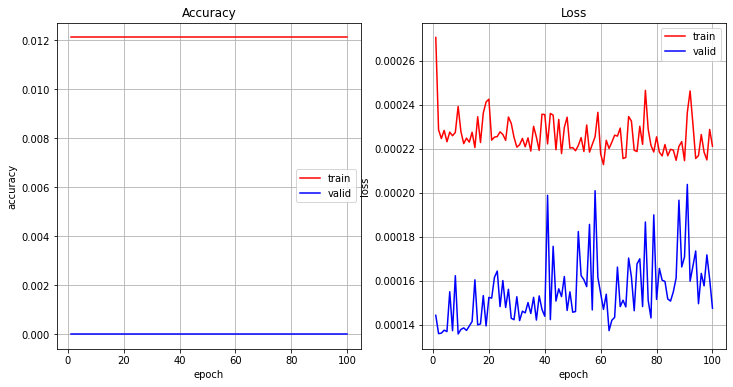

Evaluamos el modelo en train_score: [0.0002067685272777453, 0.010905125178396702]
29/29 [==============================] - 1s 3ms/step
Predecimos con los datos de train: 0.009820691624342197
Predecimos con los datos de train_cantidad/dimensiones de datos:(917, 1)
 La media de error en la prediccion en entrenamiento es: 0.009929878888422247
15/15 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.009409214398077171
 La media de error en la prediccion en test es: 0.009271483187945665
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
15/15 [==============================] - 0s 3ms/step
17
(17, 54)


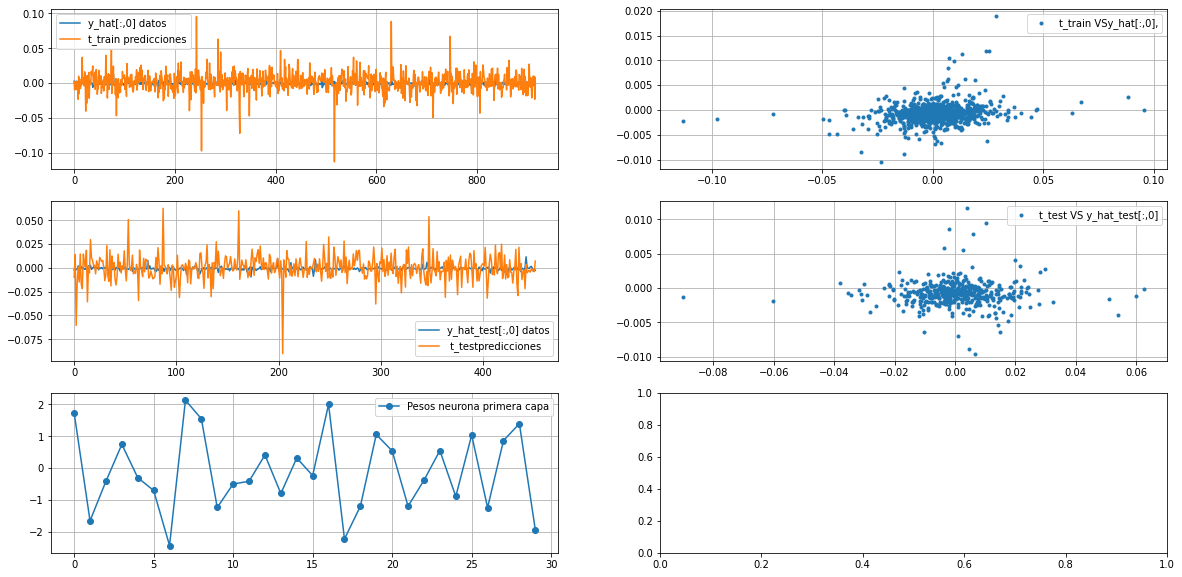

In [21]:
DAT =  sacar_open_5_valores_SIN_normalizado_y_con_numero_de_valores_CON_RETORNO_LOG ()
x_train, x_test, t_train, t_test =Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG=11,DAT_1=DAT)
model, hist = activo_caso_4(x_train, x_test, t_train, t_test)
model_title = 'EJ_5_CASO_4_Conv1D(2,3_GRU(1_LSTM(2_Dense(1_CON_RETORNO_LOG'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

In [22]:
# CONCLUSION SOBRE LA PREGUNTA DEL ENUNCIADO
# "Comparalo con un modelo con una capa lineal"
# entiendo que es como el tonto lineal del ejercicio 3

# valores mirando solo el loss de test y train como se hacia en clase:
# 'EJ_3_CASO_1_LINEAL_TONTO_CON_REG.LOG.'
# SCORE DE TRAIN: [0.023484662175178528, 0.09550561755895615]
# SCORE DE TEST: [0.023326978087425232, 0.08551881462335587]

# 'EJ_3_CASO_1_LINEAL_TONTO_normalizado_SIN_REG.LOG.'
# SCORE DE TRAIN: [0.017413152381777763, 0.00018723084940575063]
# SCORE DE TEST:[0.017069626599550247, 0.0]
# este habia bajado mas si se le hubiera subido las epocas. 
# Pero para este hercicio entiendo que vale.

# VS

# 'EJ_5_CASO_1_GRU(10_LSTM(5_Conv1D(5, 3_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN: [0.00011785412061726674, 0.0010905124945566058]
# SCORE DE TEST: [0.00014753123105037957, 0.0]

# 'EJ_5_CASO_2_GRU(2_LSTM(1_Conv1D(2, 3_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN: [0.030766544863581657, 0.0010905124945566058]
# SCORE DE TEST: [0.02991551160812378, 0.0]

# 'EJ_5_CASO_3_Conv1D(10,3_GRU(5_LSTM(5_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN:[8.03745788289234e-05, 0.0010905124945566058]
# SCORE DE TEST:[8.373150922125205e-05, 0.0]

# 'EJ_5_CASO_4_Conv1D(2,3_GRU(1_LSTM(2_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# SCORE DE TRAIN: [0.00010235523950541392, 0.0010905124945566058]
# SCORE DE TEST: [0.00011603369057411328, 0.0]

# 'EJ_5_CASO_1_GRU(10_LSTM(5_Conv1D(5, 3_Dense(1_CON_RETORNO_LOG.'
# SCORE DE TRAIN: [0.0002330134011572227, 0.010905125178396702]
# SCORE DE TEST: [0.0001935433829203248, 0.006637168116867542]

# 'EJ_5_CASO_2_GRU(2_LSTM(1_Conv1D(2, 3_Dense(1_CON_RETORNO_LOG.'
# SCORE DE TRAIN: [0.00021523657778743654, 0.010905125178396702]
# SCORE DE TEST: [0.0001862900098785758, 0.006637168116867542]

# 'EJ_5_CASO_3_Conv1D(10,3_GRU(5_LSTM(5_Dense(1_CON_RETORNO_LOG'
# SCORE DE TRAIN: [0.00023119556135497987, 0.010905125178396702]
# SCORE DE TEST: [0.0002740350610110909, 0.006637168116867542]

# 'EJ_5_CASO_4_Conv1D(2,3_GRU(1_LSTM(2_Dense(1_CON_RETORNO_LOG'
# SCORE DE TRAIN: [0.00021051449584774673, 0.010905125178396702]
# SCORE DE TEST: [0.00018180790357291698, 0.006637168116867542]

# Todos los del ej 5 dan mejor loss en train y test que el lineal tonto
# Los que los datos han sido preprocesados con RETORNO_LOG dan valores muy 
# semejantes entre ellos y no excelentes. Los que han sido preprocesados 
# los datos con una simpel normaliacion a 0-1 sin RETORNO_LOG no dan 
# valores de loss buenos a excepcion de 
# 'EJ_5_CASO_3_Conv1D(10,3_GRU(5_LSTM(5_Dense(1_NORMALIZADO_SIN_RETORNO_LOG.LOG.'
# Interesate ver que es el que empieza con una conv1 y luego GRUs y LSTM y Densas.

# Una mejora para estos algoritmos seria que en caso 3 pusiera:
#     model.add(GRU(5,return_sequences=True))
#     model.add(LSTM(5),return_sequences=True))
#     model.add(Flatten())
# y en caso 4 pusiera
#     model.add(GRU(1,return_sequences=True))
#     model.add(LSTM(2),return_sequences=True))
#     model.add(Flatten())
# pq en este caso la salida de la capa antes del flatten son uno ya que cuenta la ultima lstm sólo. 
